Text(0.5, 1.0, 'BER vs SNR for BPSK over AWGN')

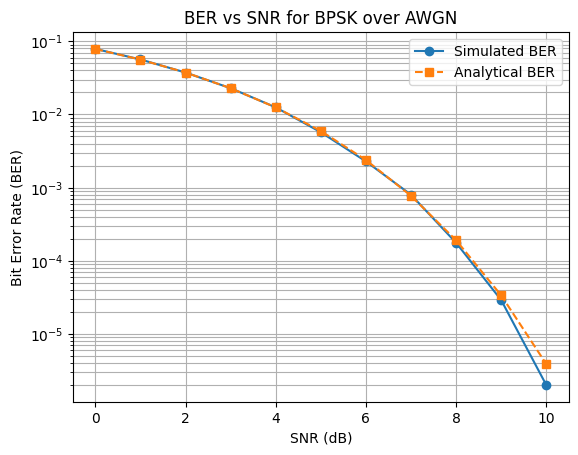

In [5]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc

# Theoretical BER of BPSK over AWGN
def ber_bpsk_theory(snr_db):
    snr_linear = 10 ** (snr_db / 10)
    return 0.5 * erfc(np.sqrt(snr_linear))

# Simulated BER
def bpsk_ber_simulation(num_bits=10**6, snr_db_range=np.arange(0, 11)):
    sim_ber = []
    for snr_db in snr_db_range:
        bits = np.random.randint(0, 2, num_bits)
        symbols = 2 * bits - 1
        snr_linear = 10**(snr_db / 10)
        noise_std = np.sqrt(1 / (2 * snr_linear))
        noise = noise_std * np.random.randn(num_bits)
        received = symbols + noise
        decoded = (received >= 0).astype(int)
        errors = np.sum(bits != decoded)
        sim_ber.append(errors / num_bits)
    return snr_db_range, sim_ber

# Plotting results
snr_db = np.arange(0, 11)
snr_db, sim_ber = bpsk_ber_simulation(snr_db_range=snr_db)
theory_ber = ber_bpsk_theory(snr_db)

plt.semilogy(snr_db, sim_ber, 'o-', label='Simulated BER')
plt.semilogy(snr_db, theory_ber, 's--', label='Analytical BER')
plt.xlabel("SNR (dB)")
plt.ylabel("Bit Error Rate (BER)")
plt.grid(True, which='both')
plt.legend()
plt.title("BER vs SNR for BPSK over AWGN")
